In [66]:
if __name__ == "__main__":
    import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import os

from pydybm.time_series.dybm import LinearDyBM
from pydybm.time_series.rnn_gaussian_dybm import RNNGaussianDyBM, GaussianDyBM
from pydybm.base.sgd import RMSProp
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.metrics import mean_squared_error
dataframe = pandas.read_csv("/home/dhruv/Downloads/BH11D_CF_Algo (labelled) - BH11D_CF_Algo (labelled).csv",
                        usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

print(dataset)
np.random.seed(2)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
RNN_dim = 10
input_dim = 1
max_epochs = 5
saveResults = False
SGD = RMSProp
decay = [0.5]

print "Number of Observations/datapoints in each dimension", len(dataset)
# split into train and test sets (default 75% train, 25% test)
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)
look_back = 1

trainPercentage = 0.75
train_size = int(len(dataset) * trainPercentage)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], input_dim))
testX = np.reshape(testX, (testX.shape[0], input_dim))
for delay in [3]:
    dybm = RNNGaussianDyBM(input_dim, input_dim, RNN_dim, 0.3,
                                   0.1, delay, decay_rates=decay, leak=1.0,
                                   SGD=SGD())

dybm.set_learning_rate(0.001)
dybm.init_state
dybm.init_state()
result = dybm.learn(trainX, get_result=True)
result2 = dybm.learn(testX, get_result=True)



[[0.24]
 [0.24]
 [0.28]
 ...
 [5.34]
 [5.71]
 [5.36]]
Number of Observations/datapoints in each dimension 12070


In [4]:

a = [154256.6]
singleX=pandas.DataFrame(np.array([
0.81,
1.14,
0.9,
0.96,
1.08,
1.24,
1.18,
1.41,
1.2,
1.12,
1.11,
1.23,
0.26,
0.27,
0.2,
0.17,
0.07,
0.17,
0.14,
0.18,
0.38,
0.5,
0.49,
0.37,
0.59,
0.98,
1.19,
1.51,
1.53,
1.54,
1.67,
1.57,
1.62,
1.99,
1.99,
1.01,
0.79,
0.07,
0.08,
0.1,
0.14,
0.05,
0.11,
0.08,
0.15,
0.3,
0.25,
0.34,
0.61,
0.98,
1.51,
2.7,
3.7,
4.03,
4.77,
5.17,
5.2,
5.54,
5.72,
3.8,
0.74,
0.46,
1.42,
0.28,
0.2,
0.08,
0.07,
0.1,
0.17,
0.35,
0.29,
0.46,
0.24,
0.43,
0.34,
0.43,
0.47,
0.75,
0.88,
0.98,
1.56,
2.68,
3,
1.26,
0.32,
0.33,
0.13,
0.2,
0.08,
0.08,
0.21,
0.37,
0.66,
0.83,
0.67,
1.03,
1.43,
1.78,
2.19,
2.22,
2.33,
2.53,
2.39,
2.45,
2.82,
3,
3.25,
2,
1.19,
0.8,
0.27,
0.29,
0.17,
0.46,
0.48,
0.72,
0.67,
0.72,
0.6,
0.59,
0.5,
0.49,
0.56,
0.34,
1.25,
1.22,
0.67,
0.94,
1.13,
0.87,
0.88,
0.16,
0.08,
0.08,
0.16,
0.15,
0.16,
0.27,
0.39,
0.28,
0.75,
0.44,
0.28,
0.36,
0.62,
0.44,
0.68,
0.96,
1.2,
1.48,
0.84,
0.62,
1.34,
1.37,
0.29,
0.34,
0.25,
0.17,
0.08,
0.16,
0.14,
0.21,
0.23,
0.57,
1.08,
1.16,
1.47,
1.72,
1.29,
1.44,
1.39,
1.36,
1.05,
1.38,
1.56,
2.01,
2.02,
0.92,
0.6,
0.29,
0.25,
0.22,
0.25,
0.26,
0.44,
0.49,
0.76,
0.7,
0.67,
0.83,
1.04,
1.43,
2.01,
    
    


]))

singleX=np.array(singleX)
singleX = np.reshape(singleX, (singleX.shape[0], input_dim))
a = dybm.learn(singleX,get_result =True)

print (a['prediction'])

print(a)


[array([1.79556436]), array([1.20169678]), array([1.25967504]), array([1.13947772]), array([1.13887101]), array([1.2030878]), array([1.3039641]), array([1.29129577]), array([1.41867663]), array([1.32859145]), array([1.26294307]), array([1.24248675]), array([1.30298884]), array([0.77347549]), array([0.66473948]), array([0.59806473]), array([0.55864456]), array([0.49072591]), array([0.52719033]), array([0.51573496]), array([0.53320666]), array([0.64471664]), array([0.7327511]), array([0.7462518]), array([0.68517401]), array([0.79276464]), array([1.02720507]), array([1.19248905]), array([1.41073046]), array([1.47581318]), array([1.50242594]), array([1.58990854]), array([1.55455566]), array([1.57944143]), array([1.80568624]), array([1.86248155]), array([1.31293888]), array([1.07416923]), array([0.62285969]), array([0.52408453]), array([0.50352156]), array([0.51117165]), array([0.45880698]), array([0.47793646]), array([0.46373357]), array([0.49734996]), array([0.58497729]), array([0.5755295

In [35]:
import sklearn
print(sklearn.metrics.roc_curve(a['actual'],a['prediction']))

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [57]:
a = dybm.learn(dataset,get_result =True)
x=[]
for ac in range(len(a['actual'])):
    x.append(((a['actual'][ac]-a['prediction'][ac])/a['actual'][ac])*100)

y=[]
i=0
for ac in range(len(x)):
    if abs(x[ac])>300:
        i=i+1
        y.append(1)
    else:
        y.append(0)

print(len(y),i)


(12070, 681)


/home/dhruv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.


y_actual = pandas.read_csv("/home/dhruv/Downloads/BH11D_CF_Algo (labelled) - BH11D_CF_Algo (labelled).csv",
                        usecols=[6], engine='python')
y_actual = y_actual.values
y_actual = y_actual.astype('float32')
print(y_actual)
import sklearn
print(sklearn.metrics.roc_curve(y_actual,y))

[0.         0.05693028 1.        ]


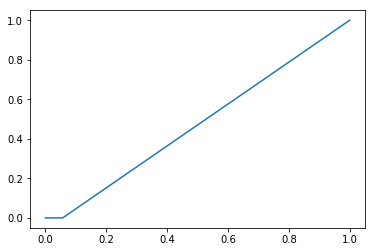

In [72]:
y_actual = pandas.read_csv("/home/dhruv/Downloads/BH11D_CF_Algo (labelled) - BH11D_CF_Algo (labelled).csv",
                        usecols=[6], engine='python')
y_actual = y_actual.values
y_actual = y_actual.astype('float32')
#print(y_actual)
import sklearn
#print(sklearn.metrics.roc_curve(y_actual,y))
frp,trp,_=sklearn.metrics.roc_curve(y_actual,y)
print frp
import matplotlib.pyplot as plt
plt.figure()
plt.plot(frp,trp)
plt.show()